### `Partie 1: Linear regression`

In [ ]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 #display output inline (available only for the jupyter notebook and the jupyter qtConsole)
%matplotlib inline

# Dataset

In [ ]:
#lire fichier csv
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DEEPLR/Salary_Data.csv')

In [ ]:
#our dataset has 30 rows and 2 columns
dataset.shape

(30, 2)

In [ ]:
#method retrieves the first 5records from our dataset
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
#to see statistical details of the dataset
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
dataset.duplicated().sum()

0

# Data points on 2-D grph

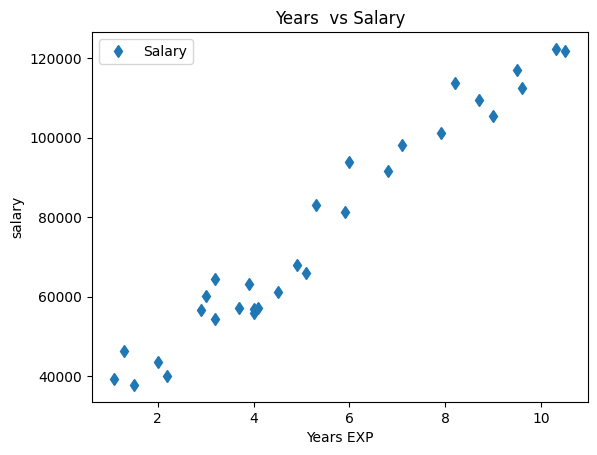

In [ ]:
dataset.plot(x='YearsExperience' ,  y='Salary' , style='d' )
plt.title('Years  vs Salary')
plt.xlabel('Years EXP')
plt.ylabel('salary')
plt.show()

# Preparing the Data

In [ ]:
x = dataset.iloc[:, :-1].values
#print(x)values column 1
y = dataset.iloc[:, 1].values
#print(y)values column 2


split this data into training and test sets.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split( x , y , test_size=0.2 , random_state=0)

# Training the algorithm

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()   #regressor nom modifiable  variable
regressor.fit(x_train, y_train )  #create modele

LinearRegression()

In [ ]:
y_pred = regressor.predict(x_test)   #making Predictions
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [ ]:
df = pd.DataFrame({'Actuel': y_test, 'Predicted': y_pred})
df

,Actuel,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


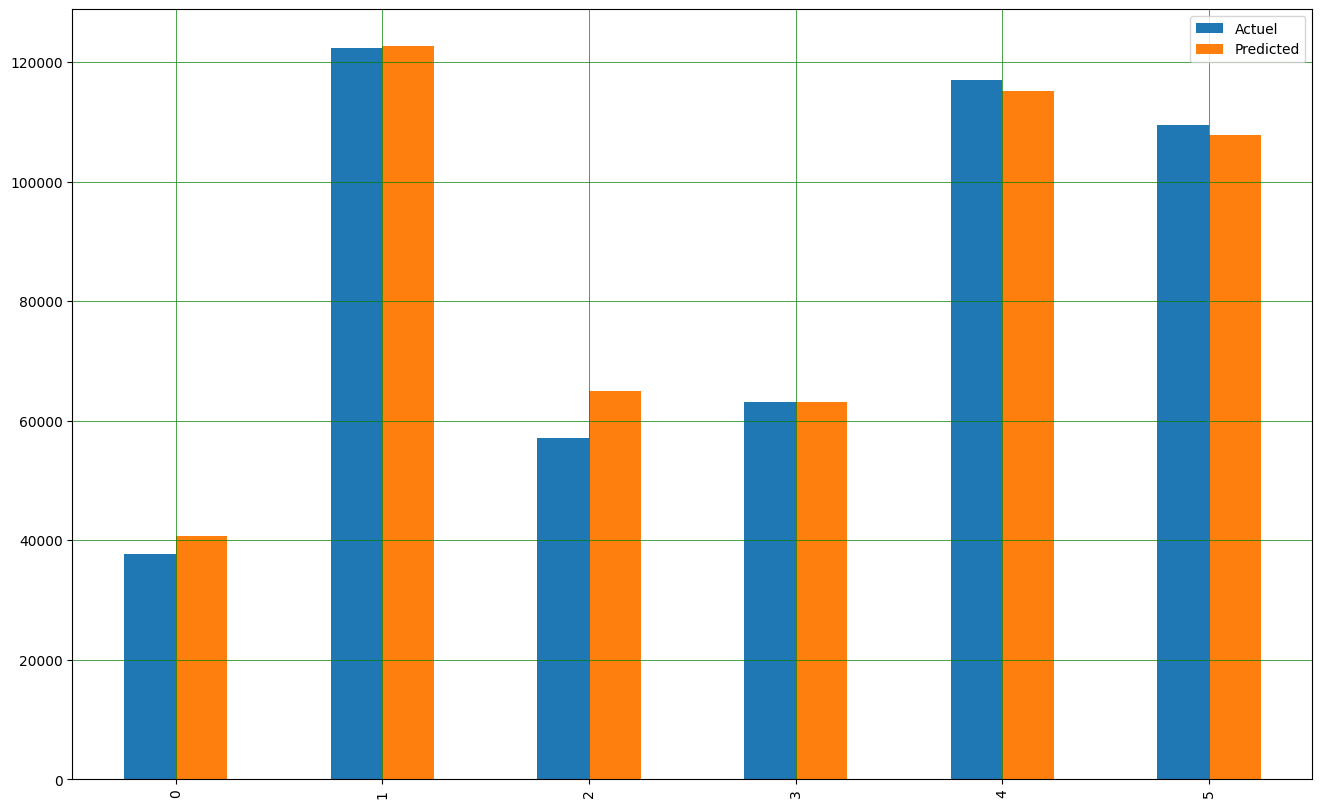

In [ ]:
df1 = df.head(25)
df1.plot(kind='bar' , figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
#voir la diffence entre actuel information et producter par machine

In [ ]:
from sklearn import metrics
print ('Mean Absolute Error is the average of all absolute errors: ' , metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred)) #the difference between your model predictions and the ground
print (' Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # is the square root of the mean of the square of

Mean Absolute Error is the average of all absolute errors:  2446.1723690465055
Mean Squared Error:  12823412.298126549
 Root Mean Squared Error: 3580.979237321343


In [ ]:
regressor.score(x, y)

0.9566628347576891

**XXX les erreurs tres eleves meme si regressor score is faible ya un problem d'error**

In [ ]:
from sklearn.metrics import mean_squared_error
print('the error of our detection Model is ', mean_squared_error(y_test , y_pred))

the error of our detection Model is  12823412.298126549


-----> error tres eleve donc notre dataset est faible alors il s'agit d'un error dans notre machine production

In [ ]:
print(regressor.intercept_) #for retrieve the intercept

26780.09915062818


In [ ]:
print(regressor.coef_) #for retrieving the slope ( coefficient of x)

[9312.57512673]


###Partie2: Multiple LR



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dataset = pd.read_csv('/content/indian_housing_data MLR.csv')

In [ ]:
dataset.head()

,exactPrice,sqftPrice,securityDeposit,propertyType,postedOn,noOfLifts,maintenanceChargesFrequency,maintenanceCharges,locality,furnishing,...,Cafeteria_Or_Food_Court,CCTV_Camera,Barbeque_Pit,Bar_Or_Lounge,Banquet_Hall,Bank__And__ATM,Arts__And__Craft_Studio,Air_Conditioned,Activity_Deck4,AEROBICS_ROOM
0,240000,171,9,Multistorey Apartment,"Jun 20, '23",9,9,9,Danapur,Semi-Furnished,...,1,0,0,1,1,0,0,0,0,0
1,12000,12,12000,Multistorey Apartment,"Jun 19, '23",1,Monthly,1500,9,Semi-Furnished,...,9,9,9,9,9,9,9,9,9,9
2,17000,7,9,Residential House,"Jun 21, '23",9,9,9,Phase 1 Ashiana Nagar,Semi-Furnished,...,9,9,9,9,9,9,9,9,9,9
3,5000,9,9,Residential House,"Jun 23, '23",9,9,9,Kumhrar,Furnished,...,9,9,9,9,9,9,9,9,9,9
4,12000,9,24000,Multistorey Apartment,"Jun 24, '23",1,Monthly,500,Kumhrar,Unfurnished,...,9,9,9,9,9,9,9,9,9,9


In [ ]:
dataset.describe()

,exactPrice,sqftPrice,securityDeposit,maintenanceCharges,firstMonthCharges,totalFlrNum,carpetArea,bedrooms,bathrooms,balconies,...,Cafeteria_Or_Food_Court,CCTV_Camera,Barbeque_Pit,Bar_Or_Lounge,Banquet_Hall,Bank__And__ATM,Arts__And__Craft_Studio,Air_Conditioned,Activity_Deck4,AEROBICS_ROOM
count,2.790000e+04,2.790000e+04,2.790000e+04,2.790000e+04,2.790000e+04,27900.000000,27900.000000,27900.000000,27900.000000,27900.000000,...,27900.000000,27900.000000,27900.00000,27900.000000,27900.000000,27900.000000,27900.000000,27900.000000,27900.000000,27900.000000
mean,5.427532e+06,4.293275e+04,2.407937e+04,2.902351e+05,3.327781e+05,5.665520,609.963584,2.673047,2.483082,4.676774,...,7.152724,7.155484,7.12319,7.133513,7.175627,7.134624,7.121900,7.141792,7.127204,7.147455
std,2.699586e+07,2.264502e+06,1.074923e+05,4.835278e+07,4.835763e+07,7.012247,837.434426,1.418080,1.490751,3.530723,...,3.594546,3.589433,3.64868,3.629878,3.551828,3.627847,3.651021,3.614706,3.641383,3.604280
min,9.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,9.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.300000e+04,1.100000e+01,9.000000e+00,9.000000e+00,9.000000e+00,2.000000,9.000000,2.000000,2.000000,2.000000,...,9.000000,9.000000,9.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
50%,3.000000e+04,2.100000e+01,9.000000e+00,9.000000e+00,9.000000e+00,4.000000,125.000000,2.000000,2.000000,3.000000,...,9.000000,9.000000,9.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,5.269500e+06,3.864250e+03,1.400000e+04,9.000000e+00,3.000000e+04,7.000000,1050.000000,3.000000,3.000000,9.000000,...,9.000000,9.000000,9.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,3.250000e+09,2.000000e+08,5.000000e+06,8.076500e+09,8.076537e+09,200.000000,13000.000000,10.000000,10.000000,10.000000,...,9.000000,9.000000,9.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


# Preparing the Data

In [ ]:
x = dataset[['exactPrice' , 'sqftPrice' ,'carpetArea' , 'bedrooms', 'bathrooms', 'balconies',  'Water_Storage', 'Waste_Disposal', 'Visitor_Parking' ]]
y = dataset['AEROBICS_ROOM']

**data into training and test sets**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size=0.3, random_state=0)


**Training the algorithm**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor1= LinearRegression()
regressor1.fit(x_train, y_train)

LinearRegression()

# To make predictions

In [ ]:
y_pred = regressor1.predict(x_test)
y_pred


array([9.00188469, 9.00391367, 8.98981631, ..., 9.00180316, 8.99302091,
       8.99389466])

compare the actual output values for x_test with the predicted values

In [ ]:
df= pd.DataFrame({'Actuel': y_test , 'Predicted': y_pred})
df

,Actuel,Predicted
9770,9,9.001885
1834,9,9.003914
9663,9,8.989816
11257,9,8.992527
23872,9,9.003352
...,...,...
20288,9,9.001523
20912,0,0.550991
3874,9,9.001803
26729,9,8.993021


**Evaluation the ALgorithm**

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error :' , metrics.mean_squared_error(y_test , y_pred))
print('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y_test , y_pred)))

Mean Absolute Error: 0.08038097331313662
Mean Squared Error : 0.047902670586651146
Root Mean Squared Error: 0.21886678730828746


**Evaluate the model**

In [ ]:
from sklearn.metrics import r2_score
Accuracy1 = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %Accuracy1)
regressor1.score(x_test , y_test)

Accuracy of the model is 99.63


0.9962653509654528

In [ ]:
from sklearn.metrics import mean_squared_error
print('the Error of our Model is : ' ,mean_squared_error(y_test, y_pred))

the Error of our Model is :  0.047902670586651146



#**Partie 3: Polynomial R**









In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
datas= pd.read_csv('/content/diamonds.csv')
datas.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,log_price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5.786897,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5.786897,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5.789960,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5.811141,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,5.814131,51.917250


In [ ]:
#dividing the dataset into 2 components
x = datas[['depth', 'table', 'price','x', 'y','z', 'log_price']]
y = datas.iloc[:, -1].values
datas.iloc[:, 1:12].info()
print(y)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cut        53940 non-null  object 
 1   color      53940 non-null  object 
 2   clarity    53940 non-null  object 
 3   depth      53940 non-null  float64
 4   table      53940 non-null  float64
 5   price      53940 non-null  int64  
 6   x          53940 non-null  float64
 7   y          53940 non-null  float64
 8   z          53940 non-null  float64
 9   log_price  53940 non-null  float64
 10  volume     53940 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 4.5+ MB
[ 38.20203   34.505856  38.076885 ... 114.449728 140.76612  124.568444]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size=0.3, random_state=0)

from sklearn.linear_model import LinearRegression
lin= LinearRegression()
lin.fit(x_train, y_train)

LinearRegression()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(x_train)

poly.fit(x_poly, y_train)

lin2= LinearRegression()

lin2.fit(x_poly , y_train)

LinearRegression()

ValueError: ignored

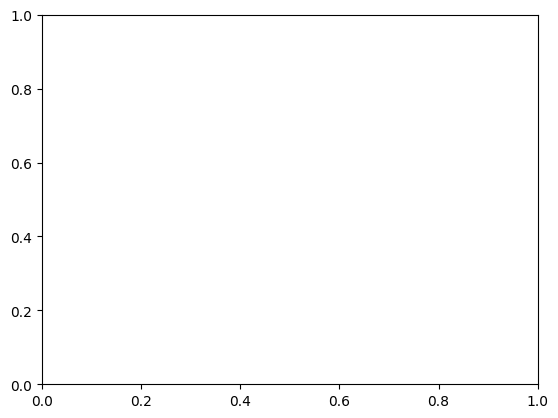

In [ ]:
import matplotlib.pyplot
#visualising the linear Regression results m
plt.scatter(x, y, color= 'blue')

plt.plot(x, lin.predict(x), color = 'red')
plt.title('Linear regression')
plt.xlabel('info diamonds')
plt.ylabel('volume')
plt.show()

In [ ]:
#visualising the Polynomial Regression results
plt.scatter(x, y , color= 'blue')

plt.plot(x, lin.predict(x, lin2.predict(poly.fit_transform(x))), color = 'red')
plt.title('Linear regression')
plt.xlabel('info diamonds')
plt.ylabel('volume')
plt.show()

In [ ]:
#Predicting a new result with linear regression after converting predict variable to 2d array

y_pred = lin.predict(x_test)   #taking predictions
y_pred

In [ ]:
#Predicting a new result with polynomial Regression after converting predict variable to 2D array

pred2 =500.0
pred2array = np.array([[pred2]])
lin2.predict(poly.fit_transform(pred2array))

In [ ]:
from matplotlib.cbook import delete_masked_points
detection_model = PolynomialFeatures(4)
detect_linear = LinearRegression()

#Fitting the data in different models
detect_linear.fit(detection_model.fit_transform(x) , y)
from sklearn.metrics import mean_squared_error

#Prediction test values and printing out Mean Squared Error
detection_preds = detect_linear.predict(detection_model.fit_transform(x))
print('the error of our detetion Model is ', mean_squared_error(y, detection_preds))


In [ ]:
#printing the accuracy scores of our models
print('the accuracy score of our detection model is :',(detect_linear.score(detection_model.fit_transform(x), y)))

In [ ]:
df = pd.DataFrame({'Actuel':y_test , 'Predicted': y_pred})
df

In [ ]:
from sklearn.metrics import mean_squared_error
print('the Error of our model is :' , mean_squared_error(y_test , y_pred))

# Partie 4: Logistic Regression

In [ ]:
from IPython.core import displaypub
import pandas as pd
#load dataset

diab = pd.read_csv('/content/train_data.csv')

In [ ]:
diab.head()

In [ ]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   792 non-null    int64  
 1   PassengerId  792 non-null    int64  
 2   Survived     792 non-null    int64  
 3   Sex          792 non-null    int64  
 4   Age          792 non-null    float64
 5   Fare         792 non-null    float64
 6   Pclass_1     792 non-null    int64  
 7   Pclass_2     792 non-null    int64  
 8   Pclass_3     792 non-null    int64  
 9   Family_size  792 non-null    float64
 10  Title_1      792 non-null    int64  
 11  Title_2      792 non-null    int64  
 12  Title_3      792 non-null    int64  
 13  Title_4      792 non-null    int64  
 14  Emb_1        792 non-null    int64  
 15  Emb_2        792 non-null    int64  
 16  Emb_3        792 non-null    int64  
dtypes: float64(3), int64(14)
memory usage: 105.3 KB


In [ ]:
feature_cols= ['PassengerId',	'Survived',	'Sex',	'Age', 'Fare','Pclass_1',	'Pclass_2', 'Pclass_3','Family_size',	'Title_1','Title_2'	,'Title_3','Title_4', 'Emb_1','Emb_2']
x = diab[feature_cols]  #features
y = diab.Emb_3  # target variable

In [ ]:
"split x and y into training and testing sets "
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.linear_model import  LogisticRegression

#instante the model (using the default parametres)
logreg = LogisticRegression(max_iter=1000)

#fit the model with data
logreg.fit(x_train , y_train)

y_pred= logreg.predict(x_test)

# Visualizing Confusion Matrix using heatmap

[[ 65   0]
 [  0 173]]


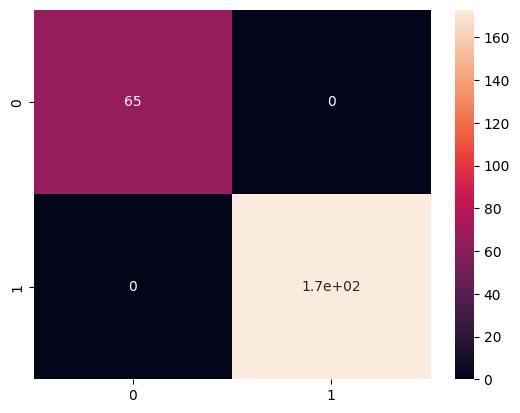

In [ ]:
#importing the required module$
import  seaborn as sns
from sklearn.metrics import confusion_matrix

#passing actual and predicted values
cm = confusion_matrix(y_test, y_pred)
print(cm)
#true write data values in each cell of matrix
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')


In [ ]:
#import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

y_pred= logreg.predict(x_train)
y_pred_probs= logreg.predict_proba(x_train)[:,1]
train_accuracy = accuracy_score(y_train, y_pred)*100
train_auc_roc = roc_auc_score(y_train, y_pred_probs)*100
print('Confusion matrix:\n', confusion_matrix(y_train, y_pred))

print('training AUC: %.4f%%' % train_auc_roc)
print('Training accuracy:%.4f%%' % train_accuracy)

In [ ]:
y_test_hat= logreg.predict(x_test)
y_test_hat_probs= logreg.predict_proba(x_test)[:,1]
train_accuracy = accuracy_score(y_test, y_test_hat)*100
train_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100
print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))

print('training AUC: %.4f%%' % train_auc_roc)
print('Training accuracy:%.4f%%' % train_accuracy)

# ROC Curve

In [ ]:
import matplotlib.pyplot as plt
y_pred_proba= logreg.predict_log_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc= metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr, label="data1, auc=" +str(auc))
plt.legend(loc=4)
plt.show()

#**Partie 5: Naive Bayes classification**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
#importing the dataset
dataset = pd.read_csv('/content/Iris_Data.csv')

#split the data into inputs and outputs
print()
print()
x= dataset[['sepal_length','sepal_width','petal_length','petal_width']]
#x = dataset[['Customer_Age','Gender','Dependent_count','Education_Level',"Marital_Status","Card_Category","Months_on_book","Total_Relationship_Count","Months_Inactive_12_mon","Contacts_Count_12_mon","Credit_Limit","Total_Revolving_Bal","Avg_Open_To_Buy","Total_Amt_Chng_Q4_Q1","Total_Trans_Amt","Total_Trans_Ct","Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"]]
print(x)
y = dataset.iloc[:, -1].values
print(y)



     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-se

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
#tarining the model using Bernolli Naive bayes lassifier

#importing classifier
from sklearn.naive_bayes import BernoulliNB

#from sklearn.preprocessing import LabelEncoder


#from sklearn.preprocessing import OneHotEncoder

#encoder = OneHotEncoder()
#y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()


#initializaing the NB
classifier= BernoulliNB()

#label_encoder = LabelEncoder()
#y_train_encoded = label_encoder.fit_transform(y_train)

#training the model

classifier.fit(x_train, y_train)

#testing the model
y_pred= classifier.predict(x_test)

In [ ]:
#accuracy of the predict values using the bernouille naives bayes classifier
#importing accuracy score
from sklearn.metrics import accuracy_score
#printing the accuracy of the model
print(accuracy_score(y_pred, y_test))

0.24444444444444444


**Training model using gaussian Naive Bayes classifier**

In [ ]:
# import Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# create a Gaussian classifier
classifier1 = GaussianNB()
#training the model
classifier1.fit(x_train , y_train )

#testing the model
y_pred1 = classifier1.predict(x_test)

In [ ]:
#importing accuracy score
from sklearn.metrics import accuracy_score
#printing the accuracy of the model
print(accuracy_score( y_test , y_pred1))

1.0


# Evaluation Naive Bayes classification performance





[[ 0  0 16]
 [ 0  0 18]
 [ 0  0 11]]


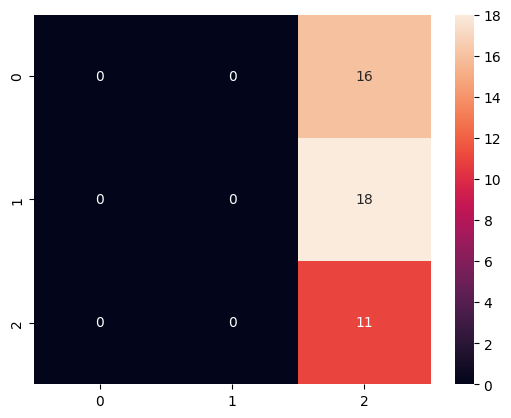

In [ ]:
#importing the required module$
import  seaborn as sns
from sklearn.metrics import confusion_matrix

#passing actual and predicted values
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)
#true write data values in each cell of matrix
sns.heatmap(cm1, annot=True)
plt.savefig('confusion.png')


# Evaluation Gaussian NB classification performance


[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]


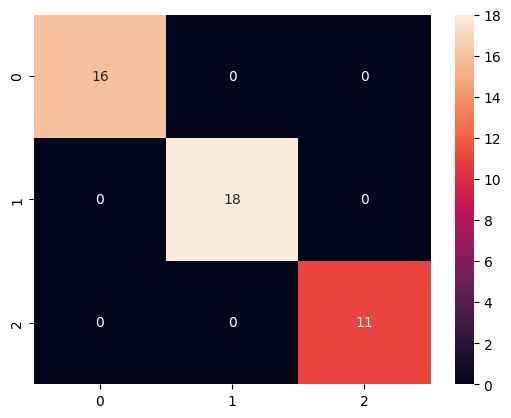

In [ ]:
#importing the required module$
import  seaborn as sns
from sklearn.metrics import confusion_matrix

#passing actual and predicted values
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)
#true write data values in each cell of matrix
sns.heatmap(cm1, annot=True)
plt.savefig('confusion.png')


In [ ]:

from sklearn import preprocessing
#assigning feature and label variables
weather=['sunny','sunny','overcast','rainy','rainny','overcast','rainy','sunny','overcast','sunny','rainny','rainy','overcast','rainny','overcast','sunny','overcast','rainy','sunny','rainny','rainy','rainny','overcast']
#output class
play= ['yes','no','yes','yes','yes','no','yes','no','yes','yes','yes','yes','no','no','no','yes','no','yes','no','yes','no','yes','no']

#import labelEncoder
from sklearn import preprocessing

#creating labelEncodder
labelCode = preprocessing.LabelEncoder()
w_encoded= labelCode.fit_transform(weather)

#w_encoded= LabelCode.fit_transform(weather)
print(w_encoded)

labelCode2= preprocessing.LabelEncoder()
p_encoded= labelCode2.fit_transform(play)
print(p_encoded)

[3 3 0 2 1 0 2 3 0 3 1 2 0 1 0 3 0 2 3 1 2 1 0]
[1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0]


In [ ]:
import numpy as np
#converting 1d array to 2D
w_2d= np.reshape(w_encoded, (-1, 1))

In [ ]:
from ipywidgets.widgets.widget_string import Label
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

#tarin the model using the training sets
model.fit(w_2d, w_encoded)


GaussianNB()

In [ ]:
#predicting the model
predicted = model.predict([[0]])
   #0:overcast

#printing predicted values
print(predicted)

[0]


# Naive BAyes C with Multiple labels

In [ ]:
#import sckit-learn dataset library
from sklearn import datasets

#load dataset
dataset = datasets.load_wine()
#print name of the 13 features
print ("Inputs:", dataset.feature_names)

#print the label type of wine
print("Outputs:" , dataset.target_names)

Inputs: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Outputs: ['class_0' 'class_1' 'class_2']


In [ ]:
print(dataset.data[0:3]) #top 3 rowsof data featureswine

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]]


In [ ]:
print(dataset.target)  # the wine data features

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


**Training the model using multiclass labels**

In [ ]:
#import train_test_split function
C

In [ ]:
#training the model
#import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#create a Gaussian Classifier
classifier = GaussianNB()
#train  the model
classifier.fit (x_train, y_train)
y_pred = classifier.predict(x_test)

Accuracy : 1.0
[[ 65   0]
 [  0 173]]


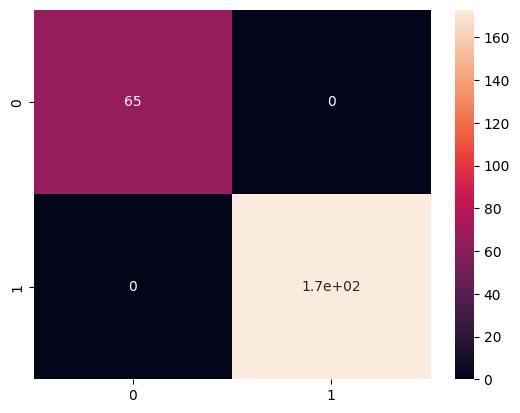

In [ ]:
import  seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn import metrics

print( "Accuracy :", metrics.accuracy_score(y_test, y_pred))
#passing actual and predicted values
cm = confusion_matrix(y_test, y_pred)
print(cm)
#true write data values in each cell of matrix
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')

### **Partie 6: Decision Tree Classifier**

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor  #import DTC
from sklearn.model_selection import train_test_split #import train_test_split function
from sklearn import metrics #Import sckit_learn metrics for accuracy calculation

#load dataset
red= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DEEPLR/winequality-red.csv')
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#split dataset inn features and target variable
feature_cols = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']


x = red[feature_cols]
y = red.quality #target variable

**Splitting data**

In [ ]:
#Split dataset into training set and test set
x_train, x_test , y_train , y_test = train_test_split(x, y, test_size=0.4, random_state=1) #40%test/ 60% training

In [ ]:
#create DEcison Tree classifier object
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

#train Decision tree C
clf = clf.fit(x_train, y_train)

#predict the response for test dataset
y_pred = clf.predict(x_test)

**Evaluating model**

In [ ]:
#importing the accuracy metrics from sklearn.metrics library

from sklearn.metrics import accuracy_score

print('Accuracy Score on train data :' , accuracy_score(y_true= y_train , y_pred=clf.predict(x_train)))
print('AccuracyScore on the test data:', accuracy_score(y_true=y_test, y_pred=clf.predict(x_test)))

Accuracy Score on train data : 1.0
AccuracyScore on the test data: 0.5875


## **Visualizing Decision Trees**

In [ ]:
from sklearn import tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_10 <= 9.85
|   |--- feature_6 <= 98.50
|   |   |--- feature_9 <= 0.57
|   |   |   |--- feature_3 <= 4.80
|   |   |   |   |--- feature_6 <= 10.50
|   |   |   |   |   |--- feature_1 <= 0.86
|   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |--- feature_1 >  0.86
|   |   |   |   |   |   |--- class: 4
|   |   |   |   |--- feature_6 >  10.50
|   |   |   |   |   |--- feature_10 <= 9.08
|   |   |   |   |   |   |--- feature_4 <= 0.08
|   |   |   |   |   |   |   |--- feature_9 <= 0.54
|   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |--- feature_9 >  0.54
|   |   |   |   |   |   |   |   |--- feature_0 <= 12.40
|   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |   |--- feature_0 >  12.40
|   |   |   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |--- feature_4 >  0.08
|   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |--- feature_10 >  9.08
|   |   |   |   |   |   |--- feature_1 <= 0.97
|   |   |

### **Partie 7: SVM**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#importing the dataset
dataset= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DEEPLR/Table_1_DataMiningandMachineLearningModelsforPredictingDrugLikenessandTheirDiseaseorOrganCategory.CSV')
#split the data into inputs and outputs
x = dataset.iloc[:, [4,20]].values
y= dataset.iloc[:, 50].values

dataset.head()  #customer had purchased the product or not

,Unnamed: 0,DGbind; logP; exact mass; Number of Carbons (NoC); Wiener index; molecular surface area (MSA); polar surface area (PSA); apolar surface area (apolarSA); hydrogen bond donor count; hydrogen bond acceptor count; rotatable bond count; atom count; hydrogen count; number of heavy atoms (NHA); molecular polarizability; aliphatic ring count; aromatic ring count; aromatic atom count; Balaban index; Harary index; bond count; hyperWiener index; Platt index; Randic index; ring count; Szeged index; Wiener polarity; and the ligand efficiencies24 DGbind_NHA; DGbind_MW; DGbind_PSA; DGbind_MSA; DGbind_apolarSA; DGbind_Wiener; DGbind_P; DGbind_NoC,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,ID,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,...,DC5,DC6,DC7,DC8,DC9,DC10,DC11,DC12,DC13,DC14
1,DR001.mol2,-9.86,1,-6.82,645.248014,25,7413,738.94,309.14,429.8,...,0,0,0,0,0,0,0,0,0,0
2,DR002.mol2,-11.25,1,-0.44,221.988131,4,257,229.89,125.64,104.25,...,0,0,0,0,0,0,0,0,1,0
3,DR003.mol2,-7.53,1,-2.73,267.096754,10,657,303.12,113.52,189.6,...,0,0,0,0,0,0,0,0,0,0
4,DR005.mol2,-6.08,1,-0.8,136.038511,5,105,154.04,74.69,79.35,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size=0.3, random_state=0)

ValueError: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler

#scalling the input data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

ValueError: ignored